# **EC9630 Machine Learning - Laboratory 1**
    TASK : STASTICAL PATTEN CLASSIFICATION – DECISION TREE AND INFORMATION GAIN
    NAME : KAMSAYINI.S
    REG. NO: 2020/E/185
    DATE : PROGRESS 24 APR 2024
           SUBMISSION 05 MAY 2024
    TIME: 08a.m. to 11a.m.


---









**Some of the References**

Into the Python programming - https://www.kaggle.com/learn/intro-to-programming

Pandas Tutorial - https://pandas.pydata.org/docs/getting_started/intro_tutorials/

Data Visualization - https://www.kaggle.com/learn/data-visualization

Cross validation - https://www.kaggle.com/code/alexisbcook/cross-validation

Decision Tree classifier SCIKIT learn - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# 1.Download CDC Diabetes Health Indicators datase**t: from UCI.
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# The ucimlrepo package is designed to simplify the process of downloading datasets from the UCI Machine Learning Repository. INSTALL IT.

In [2]:
pip install ucimlrepo



 **Import libraries needed**


In [3]:
# Import library for potentially fetching data from UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo  # Might be removed if data is loaded elsewhere

# Import libraries for data manipulation and analysis
import pandas as pd  # Used for dataframes, manipulation, and analysis
import numpy as np  # Used for numerical computations (potentially within the model)

# Import libraries for data visualization
import matplotlib.pyplot as plt  # Used for creating various plots
import seaborn as sns  # Statistical data visualization built on top of matplotlib

# Import libraries for model building, splitting, and evaluation
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Class for creating and training decision tree models
from sklearn.metrics import (  # Various metrics for evaluating model performance
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
)

# Import libraries for hyperparameter tuning (optional)
from sklearn.model_selection import (
    cross_validate,
    GridSearchCV,
)

# 2.Analyse the information provided in the website.



a. Read all the information

In [4]:
# Fetch dataset
data = fetch_ucirepo(id=891)

# If downloaded the dataset read all information
#data = pd.read_csv("DataDownload.csv", nrows=10)  # Read only the first 10 rows
#DataDownload(data)




  b.Explain the Variable type information

  c.Identify features and labels
  
  d.Identify the feature value distribution


In [5]:
cdc_diabetes_health_dataset = fetch_ucirepo(id=891)
# Variable Information
print("Variable Information:")
print(cdc_diabetes_health_dataset.variables)
print()
# Get variable type information
print("\nb. Variable Types:")
print(cdc_diabetes_health_dataset.dtypes)

# Data (as pandas DataFrames)
X = cdc_diabetes_health_dataset.data.features
y = cdc_diabetes_health_dataset.data.targets



Variable Information:
                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature

In [6]:
# Metadata
print
("Metadata:")
print(cdc_diabetes_health_dataset.metadata)
print()


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [7]:

# Identify Features and Labels
print("Identifying Features and Labels:")
print("Features:")
print(X.head().to_string(index=False))
print()
print("Labels:")
print(y.head().to_string(index=False))
print()



Identifying Features and Labels:
Features:
 HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income
      1         1          1   40       1       0                     0             0       0        1                  0              1            0        5        18        15         1    0    9          4       3
      0         0          0   25       1       0                     0             1       0        0                  0              0            1        3         0         0         0    0    7          6       1
      1         1          1   28       0       0                     0             0       1        0                  0              1            1        5        30        30         1    0    9          4       8
      1         0          1   27       0       0                     0             1

In [8]:
# Variable Type Information
print("Variable Type Information:")
variable_types = {key: "Numeric" if isinstance(value, np.ndarray) else "Categorical" for key, value in X.items()}
for key, value in variable_types.items():
    print(f"{key}: {value}")
print()
# Identify the Feature Value Distribution
print("Identifying the Feature Value Distribution:")
for column in X.columns:
    print(f"Feature: {column}")
    if variable_types[column] == "Numeric":
        print(X[column].describe().to_string())
    else:
        print(X[column].value_counts().to_string())
    print()

Variable Type Information:
HighBP: Categorical
HighChol: Categorical
CholCheck: Categorical
BMI: Categorical
Smoker: Categorical
Stroke: Categorical
HeartDiseaseorAttack: Categorical
PhysActivity: Categorical
Fruits: Categorical
Veggies: Categorical
HvyAlcoholConsump: Categorical
AnyHealthcare: Categorical
NoDocbcCost: Categorical
GenHlth: Categorical
MentHlth: Categorical
PhysHlth: Categorical
DiffWalk: Categorical
Sex: Categorical
Age: Categorical
Education: Categorical
Income: Categorical

Identifying the Feature Value Distribution:
Feature: HighBP
HighBP
0    144851
1    108829

Feature: HighChol
HighChol
0    146089
1    107591

Feature: CholCheck
CholCheck
1    244210
0      9470

Feature: BMI
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
23    15610
29    14890
30    14573
22    13643
31    12275
32    10474
21     9855
33     8948
34     7181
20     6327
35     5575
36     4633
37     4147
19     3968
38     3397
39     2911
40     2258
18     1803
41     1659

# 3.Exploratory data analysis and necessary preprocessing.

First few rows of the dataset:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary

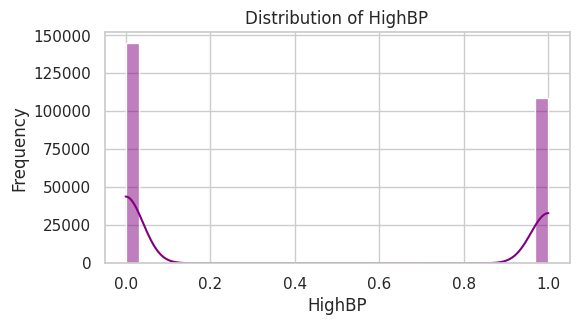

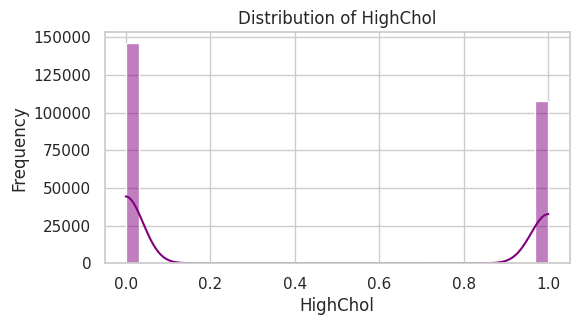

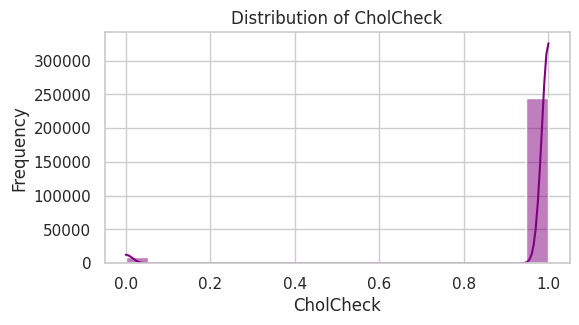

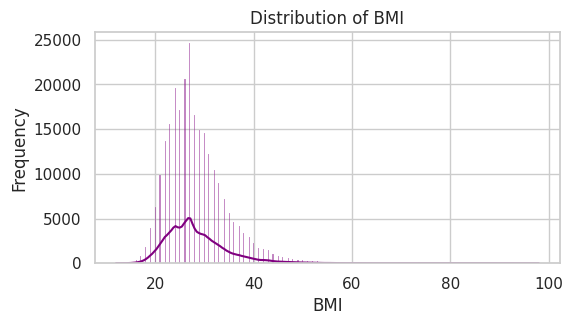

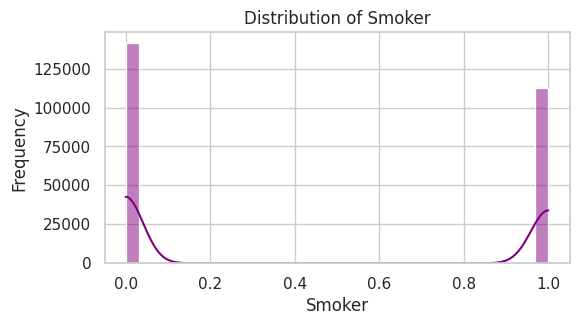

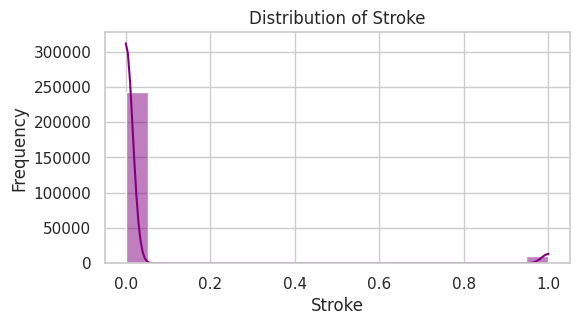

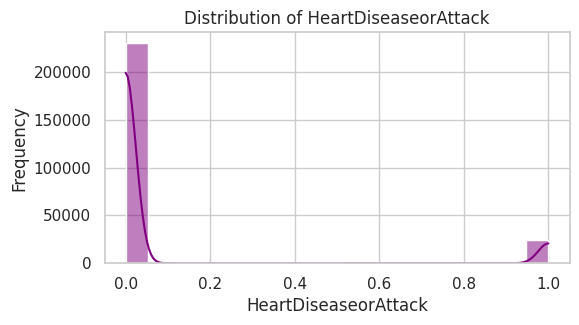

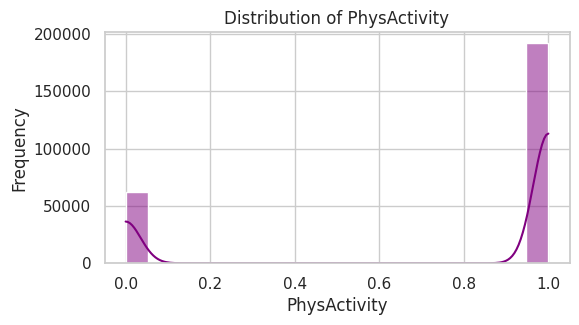

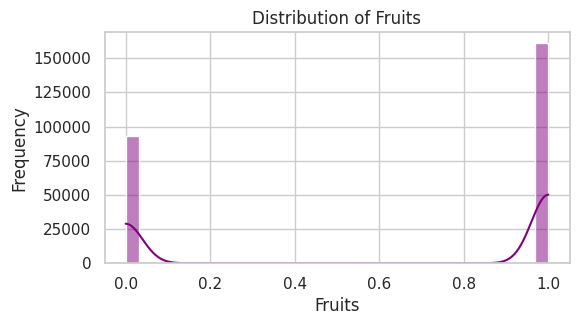

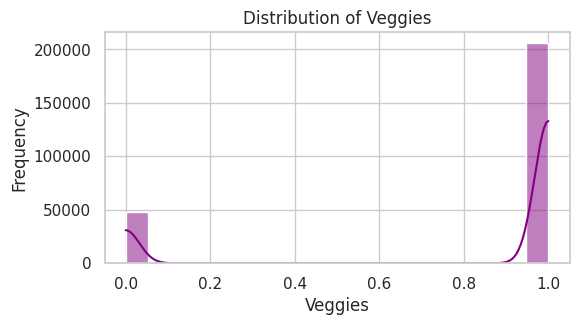

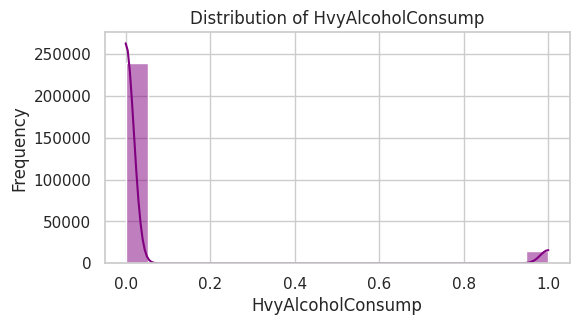

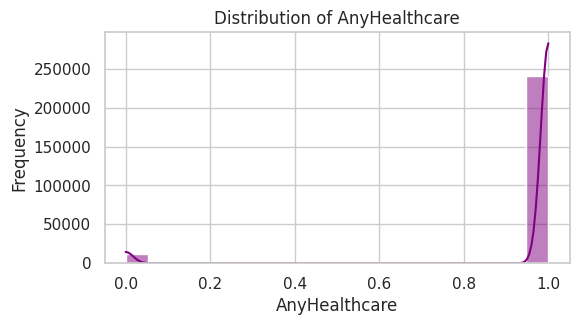

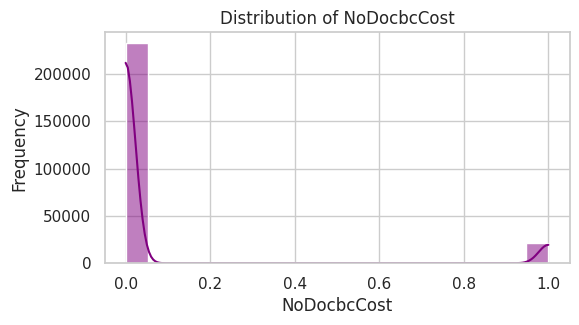

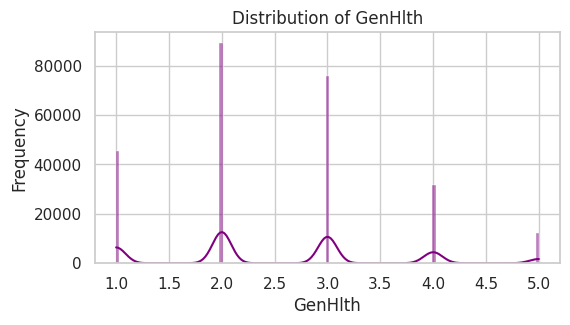

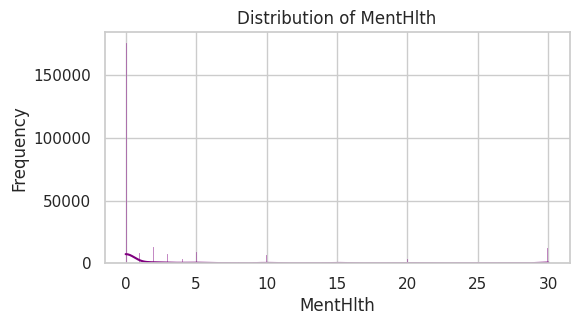

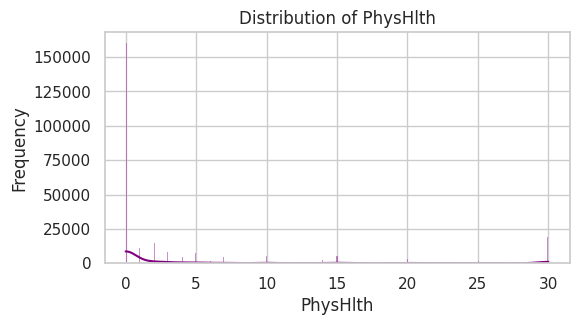

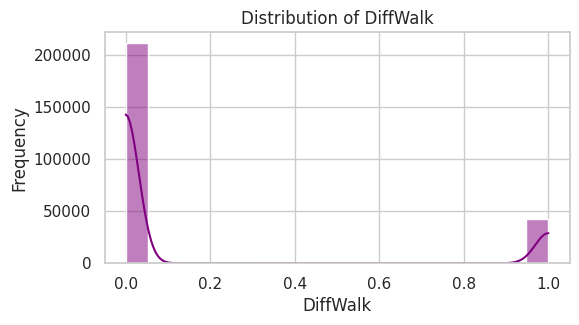

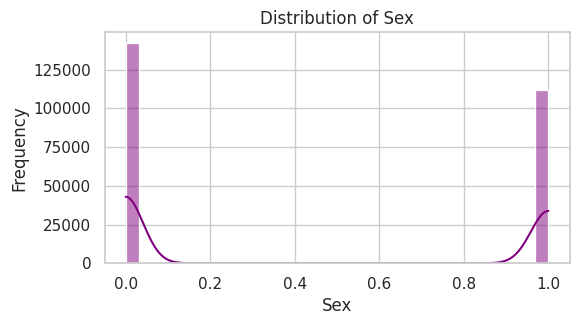

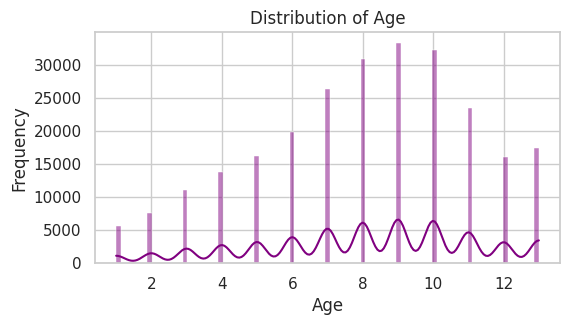

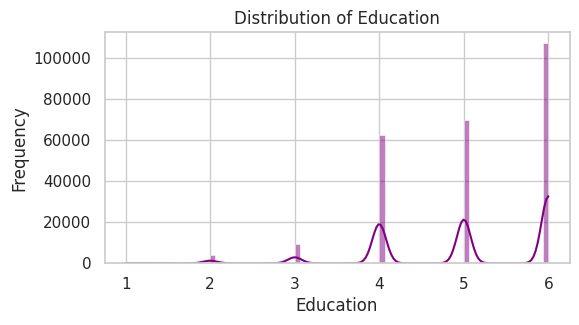

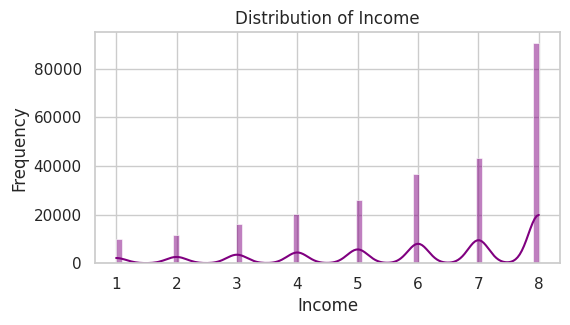

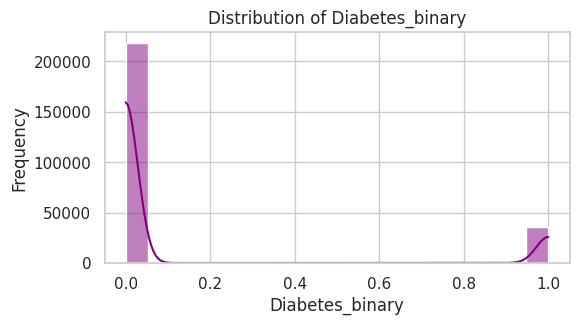


Data Types:
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

Summary statistics for numeric featuresin the CDC Diabetes Health Indicators dataset:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.49493

In [9]:

# Concatenate features and target for analysis
df = pd.concat([X, y], axis=1)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
print()

# Get information about variable types and missing values
print("\nVariable types and missing values in CDC Diabetes Health Indicators dataset:")
print(df.info())
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())
print()

# Summary statistics for numeric columns
print("Summary statistics for numeric columns:")
print(df.describe())
print()

# Check the shape of the dataset
print("Shape of the dataset:")
print(df.shape)
print()

# Basic statistics for numeric columns
print("\nBasic Statistics for Numeric Columns:")
print(df.describe())

# Select categorical columns (assuming string dtype)
categorical_cols = df.select_dtypes(include='object')
# Print count of unique values for each categorical column
print("Count of unique values in categorical columns:")
for col in categorical_cols.columns:
  print(f"{col}: {df[col].nunique()}")

# Check unique values for categorical columns
print("Unique values for categorical columns:")
for column in df.select_dtypes(include=["object"]).columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")
print()

# Visualize the distribution of numeric columns
sns.set(style="whitegrid")
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column], kde=True, color='purple')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Visualize the distribution of categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=column, palette="Set2")
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

# Get data types
print("\nData Types:")
print(df.dtypes)

# Summary statistics for numeric features
print("\nSummary statistics for numeric featuresin the CDC Diabetes Health Indicators dataset:")
print(df.describe())

In [10]:
# Step : Preprocess the Data
# Handle missing values (if any)
# fill missing values with the most frequent value in each column. here no missing values no need

# df = df.fillna(df.mode().iloc[0])

# Encode categorical variables
# As all categorical variables are already binary (Yes/No), we don't need to perform encodin
# Confirm if there are no more missing values

#print("\nMissing Values after handling:")
#print(df.isnull().sum())

# Save the preprocessed data to a new CSV file if needed
# df.to_csv("preprocessed_diabetes_data.csv", index=False)
# Display the first few rows after preprocessing


# 4.Separate the dataframe into features and labels.

Features DataFrame:
Shape: (253680, 21)

Labels DataFrame:
Shape: (253680, 1)



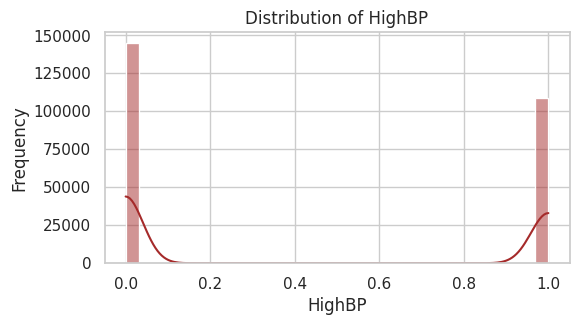

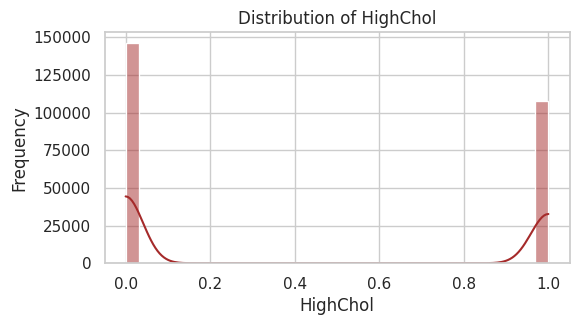

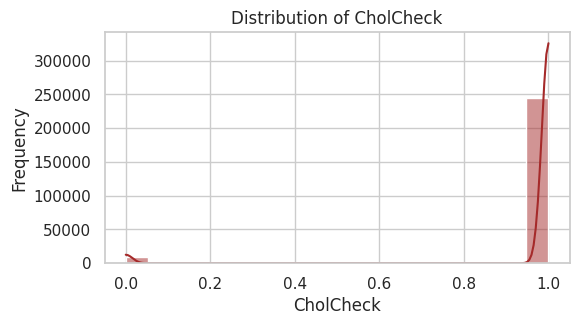

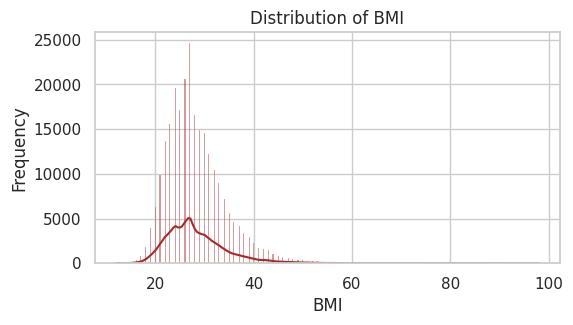

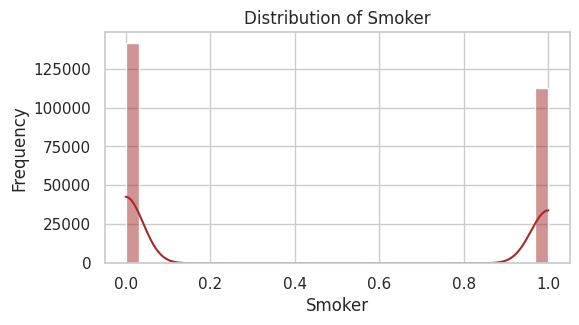

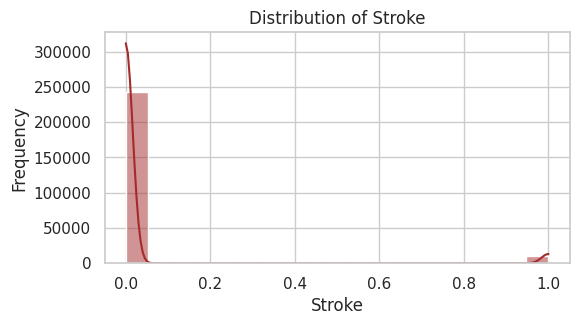

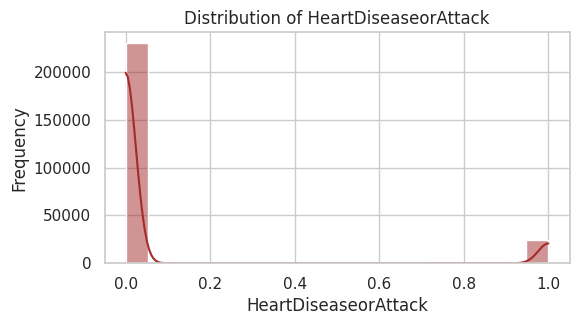

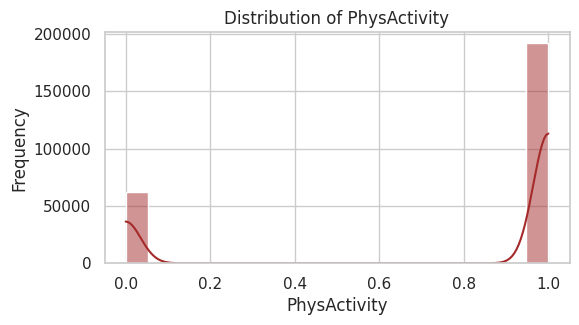

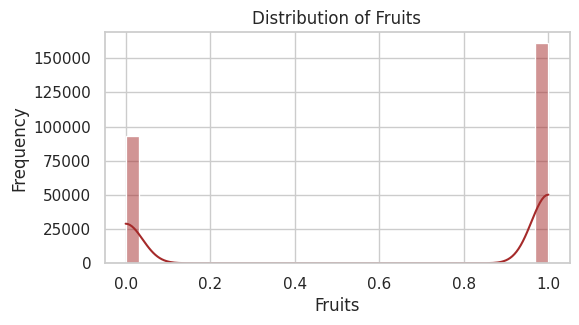

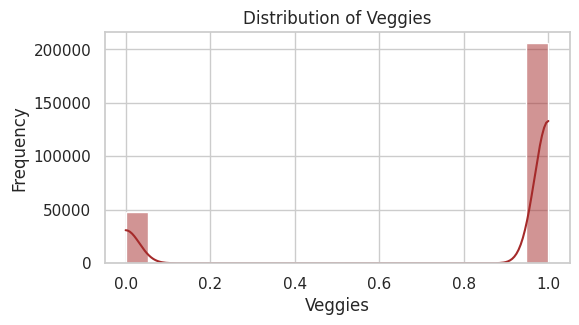

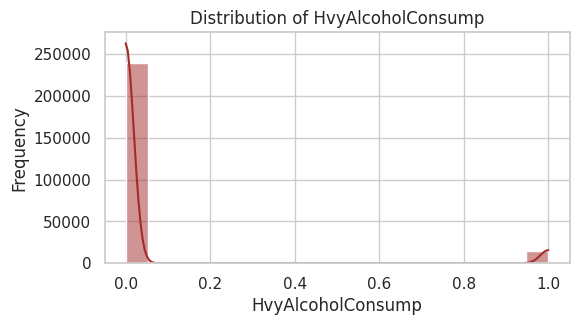

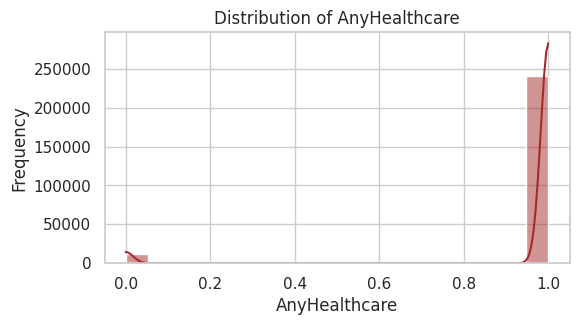

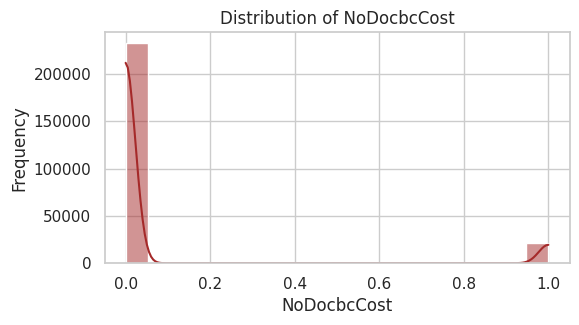

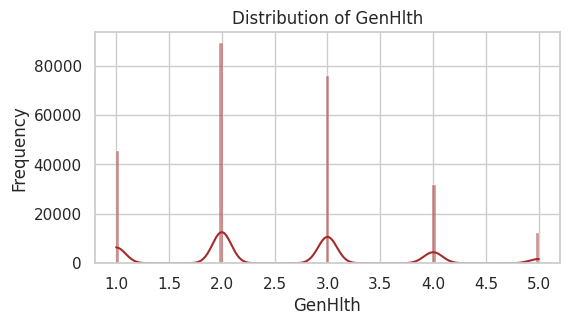

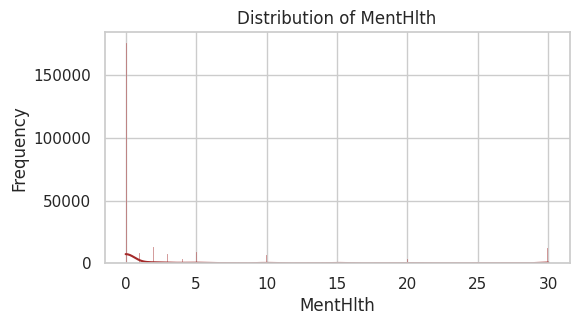

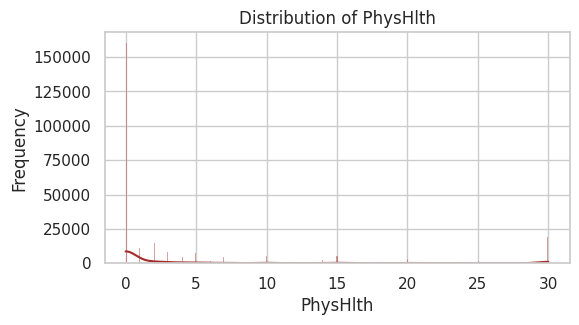

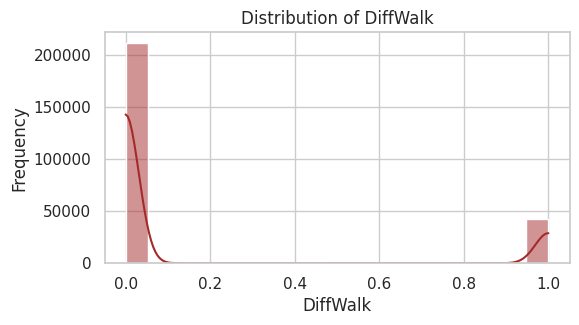

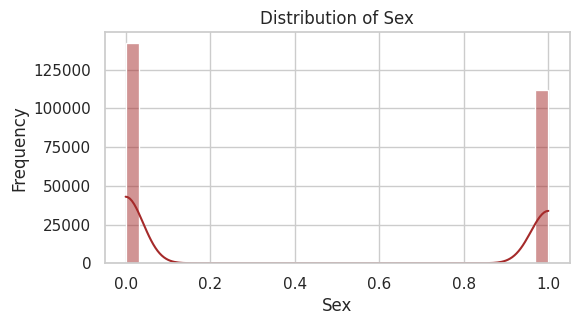

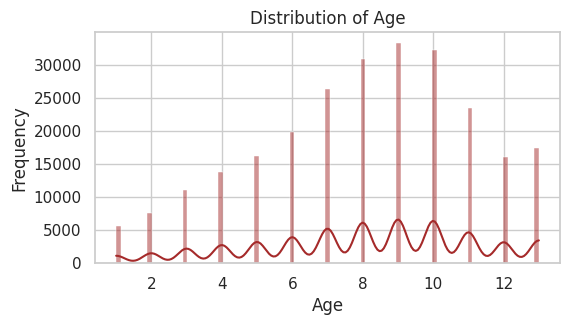

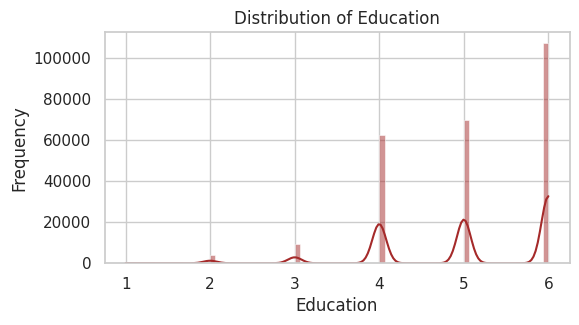

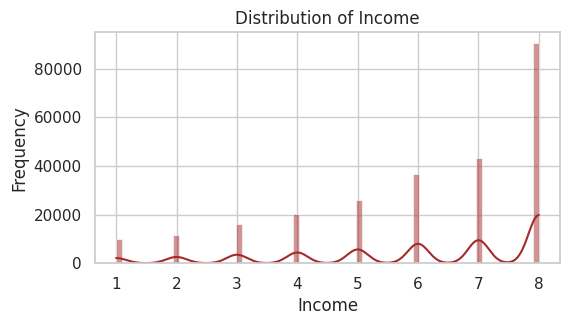

In [11]:
# Separate features and labels
features = X.copy()
labels = y.copy()

# Print the number of rows and columns in the features DataFrame
print("Features DataFrame:")
print(f"Shape: {features.shape}")
print()

# Print the number of rows and columns in the labels DataFrame
print("Labels DataFrame:")
print(f"Shape: {labels.shape}")
print()

# Visualize the distribution of numeric columns
sns.set(style="whitegrid")

# Distribution of numeric columns
numeric_columns = features.select_dtypes(include=["int64", "float64"]).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(features[column], kde=True, color='brown')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Visualize the count of categorical columns
categorical_columns = features.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=features, x=column, palette="Set2")
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
print("\nFirst few rows after preprocessing:")
print(df.head())

# Display the shapes of features and labels
print("Shape of Features (X):", features.shape)
print("Shape of Labels (y):", labels.shape)

# Display first few rows of features and labels
print("\nFirst few rows of Features:")
print(features.head())
print("\nLabels:")
print(labels.head())


# Convert categorical features to numerical for mutual_info_classif
features_numeric = pd.get_dummies(features, drop_first=True)


First few rows after preprocessing:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_


# 5.Display the dataframe into features and labels and find information gain

Features DataFrame:
        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                          0             0       0        1  ...   
1                          0             1       0        0  ...   
2                          0             0       1     

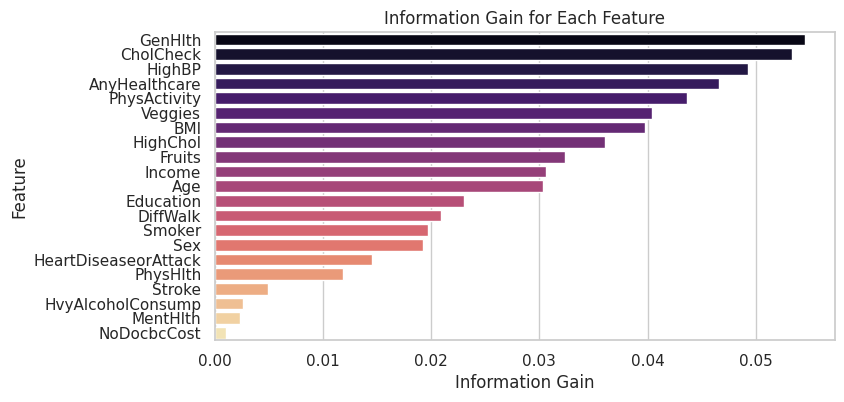

In [13]:
# Display all rows of the features DataFrame
print("Features DataFrame:")
print(features)
print()

# Display all rows of the labels DataFrame
print("Labels DataFrame:")
print(labels)
print()

from sklearn.feature_selection import mutual_info_classif
# Compute information gain for each feature
labels = labels.values.ravel()
information_gain = mutual_info_classif(features, labels)

# Create a DataFrame to display information gain for each feature
information_gain_dataframe = pd.DataFrame({"Feature": features.columns, "Information Gain": information_gain})
information_gain_dataframe  = information_gain_dataframe .sort_values(by="Information Gain", ascending=False)

# Print information gain for each feature
print("Information Gain for Each Feature:")
print(information_gain_dataframe )
print()

# Plot information gain
plt.figure(figsize=(8, 4))
sns.barplot(data=information_gain_dataframe , x="Information Gain", y="Feature",hue="Feature", palette="magma")
plt.title("Information Gain for Each Feature")
plt.xlabel("Information Gain")
plt.ylabel("Feature")
plt.show()


# 5.Information gain

In [15]:

# Display information gain for each feature
print("Information Gain for each feature:")
print(information_gain_dataframe )
# Discuss data distribution based on information gain
# Higher information gain shows the feature is more important for predicting the target
# Features with higher information gain are more relevant and may have better predictive.
# Lower information gain states that the feature is less important
# Visualize information gain for better understanding (optional)


Information Gain for each feature:
                 Feature  Information Gain
13               GenHlth          0.054536
2              CholCheck          0.053337
0                 HighBP          0.049236
11         AnyHealthcare          0.046583
7           PhysActivity          0.043626
9                Veggies          0.040362
3                    BMI          0.039728
1               HighChol          0.036037
8                 Fruits          0.032357
20                Income          0.030618
18                   Age          0.030333
19             Education          0.023065
16              DiffWalk          0.020927
4                 Smoker          0.019754
17                   Sex          0.019300
6   HeartDiseaseorAttack          0.014534
15              PhysHlth          0.011893
5                 Stroke          0.004980
10     HvyAlcoholConsump          0.002670
14              MentHlth          0.002376
12           NoDocbcCost          0.001061


# state your argument about the data distribution.

Discuss data distribution based on information gain
Higher information gain suggests the feature is more important for predicting the target
Features with higher information gain are more relevant and may have better predictive pow
Lower information gain suggests the feature is less important
Visualize information gain for better understanding

The provided output shows the "Information Gain for Each Feature" in the CDC Diabetes Health Indicators dataset. Information Gain is a measure of how much a feature helps predict the target variable (diabetes diagnosis here).

Analysis of the data distribution based on the information gain values:

Important Features:
Features with higher information gain (> 0.04):
GenHlth (General Health)
CholCheck (Cholesterol Check)
HighBP (High Blood Pressure)
AnyHealthcare (Any Healthcare Utilization)
PhysActivity (Physical Activity)
Veggies (Vegetable Consumption)
BMI (Body Mass Index) These features have a stronger influence on predicting diabetes. The data likely shows a clearer distinction in these factors between people diagnosed with diabetes and those without.
Less Important Features:

Features with lower information gain (< 0.02):
Sex
Stroke
HvyAlcoholConsump (Heavy Alcohol Consumption)
MentHlth (Mental Health)
NoDocbcCost (No Doctor Visits Due to Cost) These features have a weaker influence on predicting diabetes. The data distribution for these factors might be similar between diabetic and non-diabetic patients, making them less informative for the prediction task.

Information gain is just one measure of feature importance. Other factors like correlation and feature interactions can also play a role. It's recommended to explore these aspects alongside information gain for a more comprehensive understanding.


Overall, The data likely shows a clearer separation in health-related factors (General Health, Cholesterol Check, Blood Pressure, Healthcare Utilization) between diabetic and non-diabetic patients. Conversely, demographic factors like Sex or behaviors like Heavy Alcohol Consumption might be less impactful based on the information gain values.

# 6.Split Data for Train, Validation, Testing as 70%, 20%, 10% respectively.

splits the data into training, validation, and testing sets with the desired proportions (70%, 20%, and 10%, respectively). Here's a breakdown of the steps:

1. First Split (Training & Combined Testing/Validation):

train_test_split(test_size=0.3) divides features and labels into training and testing/validation sets.
This allocates 30% of the data to the combined testing/validation set (X_remaining and y_remaining in this case).
The remaining 70% becomes the initial training set (X_train and y_train).
2. Second Split (Testing & Validation):

This split operates on the combined testing/validation set (X_remaining and y_remaining) obtained from the first split.
test_size=0.33 further splits this set into testing (X_test and y_test) and validation (X_val and y_val). Here, 0.33 represents one-third, which is approximately 33.33%.
In simpler terms, this split takes one-third of the combined testing/validation data and assigns it as the final testing set.
The remaining two-thirds (approximately 66.67%) become the validation set.
Resulting Splits and Proportions:

Set	Proportion (of original data)	Purpose

Training	0.70	Train the machine learning model
Validation	0.20 (approximately)	Evaluate different models/hyperparameters
Testing	0.10 (approximately)	Evaluate the final model's generalizability



The first split defines the overall testing/validation proportion at 30%.
The second split happens within the combined testing/validation data, allocating approximately two-thirds to validation and one-third to testing.
This approach ensures a 70-20-10 split for training, validation, and testing, respectively.

# Split Data for Train, Validation, Testing as 70%, 20%, 10% respectively.



In [16]:
# Split the data into training, validation, and testing sets
# Split data into training and testing sets (70/30 split)
X_train, X_remaining, y_train, y_remaining = train_test_split(features, labels, test_size=0.3, random_state=42)
# Further split the testing/validation set (20%/10%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.33, random_state=42)


# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Training set shape: (177576, 21) (177576,)
Validation set shape: (50989, 21) (50989,)
Testing set shape: (25115, 21) (25115,)
Shape of X_train: (177576, 21)
Shape of X_val: (50989, 21)
Shape of X_test: (25115, 21)
Shape of y_train: (177576,)
Shape of y_val: (50989,)
Shape of y_test: (25115,)


# 7.Build Decision tree model

In [17]:
# Create the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
#can do as below. it continues at later part in best model fit
# model = DecisionTreeClassifier(criterion='gini', max_depth=3)

criterion (gini or entropy): This determines how good a split is at separating data into classes. Lower values of Gini impurity or entropy indicate a better split.

max_depth (integer): This controls the maximum tree depth, impacting its complexity. Deeper trees can learn complex relationships but are more prone to overfitting. Experiment with different depths to find the optimal one for your data.

min_samples_split (integer or float): This sets the minimum number of samples required to split a node. Higher values prevent overfitting by avoiding splits with too few data points, but can also lead to underfitting if set too high.

min_samples_leaf (integer or float): This defines the minimum number of samples allowed in a leaf node. Higher values prevent underfitting by ensuring each leaf contains enough data points to represent its class, but can also increase tree complexity.

max_features (integer, float, string, or None): This controls the number of features considered at each split. Lower values can prevent overfitting by reducing model complexity, but might miss important features. You can try different values or use strategies like "sqrt" or "log2" to automatically select a subset of features.

# 8.Train the model using Train set.

In [18]:
# Train the model on the training set # Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 9.Predict the labels for validation set.

In [19]:
y_val_pred = clf.predict(X_val)
# Display the predicted labels
print("Predicted Labels for Validation Set:")
print(y_val_pred)

Predicted Labels for Validation Set:
[0 0 0 ... 0 0 1]


# 10.State the Evaluation score (Accuracy, Precision, Recall, F1).  

In [20]:

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Evaluation Scores on validation set :")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Scores on validation set :
Accuracy: 0.7969
Precision: 0.8061
Recall: 0.7969
F1 Score: 0.8013


In [ ]:
# Make predictions on the testing set (optional)
#y_test_pred = clf.predict(X_test)

# Evaluate the model's performance on the testing set (optional)
# You can calculate the same evaluation metrics (accuracy, precision, recall, F1) on the testing set


# 11.Now apply 5-Fold Cross validation and state the evaluation.  

In [ ]:

# Perform 5-fold cross-validation
#scores = cross_val_score(clf, features, labels, cv=5)
#mean_score = scores.mean()
#print("Mean Score:", mean_score)


In [21]:

# use the entire preprocessed dataset for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}
# Perform 5-Fold Cross-Validation with cross_validate
# We'll use the entire preprocessed dataset for cross-validation
cv_results = cross_validate(clf, features, labels, cv=5, scoring=scoring)
print("Cross Validation Scores:", cv_results)

print("\nCross-Validation Scores:")
for metric, scores in cv_results.items():
    print(f"{metric}: {scores.mean():.4f} (std: {scores.std():.4f})")
print()

# Extract mean scores
mean_accuracy = cv_results['test_accuracy'].mean()
mean_precision = cv_results['test_precision'].mean()
mean_recall = cv_results['test_recall'].mean()
mean_f1 = cv_results['test_f1'].mean()
# Display the mean scores
print("Cross-Validation Evaluation Scores (Mean):")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-score:", mean_f1)


Cross Validation Scores: {'fit_time': array([1.13343048, 1.11648035, 1.12867999, 1.13939953, 1.11944771]), 'score_time': array([0.08358932, 0.08637738, 0.09154034, 0.08639932, 0.07916498]), 'test_accuracy': array([0.79848628, 0.79239593, 0.8003193 , 0.79267187, 0.7975205 ]), 'test_precision': array([0.80410321, 0.80424508, 0.80658757, 0.80346733, 0.80713344]), 'test_recall': array([0.79848628, 0.79239593, 0.8003193 , 0.79267187, 0.7975205 ]), 'test_f1': array([0.80122692, 0.79803508, 0.80336584, 0.79783345, 0.80212578])}

Cross-Validation Scores:
fit_time: 1.1275 (std: 0.0085)
score_time: 0.0854 (std: 0.0040)
test_accuracy: 0.7963 (std: 0.0032)
test_precision: 0.8051 (std: 0.0015)
test_recall: 0.7963 (std: 0.0032)
test_f1: 0.8005 (std: 0.0022)

Cross-Validation Evaluation Scores (Mean):
Accuracy: 0.7962787764112267
Precision: 0.8051073255644956
Recall: 0.7962787764112267
F1-score: 0.8005174146809495



# Define the grid of hyperparameters and train the model with best parameters






In [22]:

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
dt_classifier_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier_best.fit(X_train, y_train)

# Predict using the best model
y_pred_val_best = dt_classifier_best.predict(X_val)

# Evaluate the best model
accuracy_best = accuracy_score(y_val, y_pred_val_best)
precision_best = precision_score(y_val, y_pred_val_best,average='weighted')
recall_best = recall_score(y_val, y_pred_val_best, average='weighted')
f1_best = f1_score(y_val, y_pred_val_best, average='weighted')

print(" Evaluation Scores :")
print(f"Accuracy test: {accuracy_best:.2f}")  # Format accuracy_test with 2 decimal places
print(f"Precision test: {precision_best:.2f}")  # Format precision_test with 2 decimal places
print(f"Recall test: {recall_best:.2f}")  # Format recall_test with 2 decimal places
print(f"F1-score test: {f1_best:.2f}")  # Format f1_test with 2 decimal places


 Evaluation Scores :
Accuracy test: 0.86
Precision test: 0.83
Recall test: 0.86
F1-score test: 0.82


param_grid that specifies the grid of hyperparameters to search for the decision tree model.

# Used Hyperparameters:

criterion: This searches for both 'gini' and 'entropy' options to determine the best function for measuring split quality.

max_depth: This explores trees with no limit (None), depths of 5, 10, and 15 to find the optimal complexity level.

min_samples_split: This searches for minimum split samples of 2, 5, and 10 to prevent overfitting by avoiding splits with very few data points.
min_samples_leaf: This explores minimum leaf samples of 1, 2, and 4 to ensure sufficient data points in each leaf and prevent underfitting.


# Additional Hyperparameters (Optional):

The code covers some key hyperparameters. There are some other too.

max_features: can include a range of values or strategies ("sqrt", "log2") to control the number of features considered on each split.

ccp_alpha (float): This parameter introduces cost-complexity pruning to control overfitting by penalizing complex trees. Experiment with different values for potential improvements.

class_weight (dict, 'balanced', or None): If the dataset has imbalanced classes, can use class weights to adjust the model's learning behavior and improve performance for minority classes.

# Finally, atlast test the best model on the test data for the best fit model with improved scores

In [23]:

# Evaluate the best model
# Predict using the best model
y_pred_test_best = dt_classifier_best.predict(X_test)
# Evaluate the best model
accuracy_test = accuracy_score(y_test, y_pred_test_best)
precision_test = precision_score(y_test, y_pred_test_best,average='weighted')
recall_test = recall_score(y_test, y_pred_test_best, average='weighted')
f1_test = f1_score(y_test, y_pred_test_best, average='weighted')
# Display the mean scores
print(" Evaluation Scores :")
print("Accuracy test:", accuracy_test)
print("Precision test:", precision_test)
print("Recall test:", recall_test)
print("F1-score test:", f1_test)


 Evaluation Scores :
Accuracy test: 0.8666135775433008
Precision test: 0.8283480452470898
Recall test: 0.8666135775433008
F1-score test: 0.820849456984581
